In [817]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [818]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz']


In [819]:
patients = pd.read_csv('../BL_Work/grondTruths/gp-reg-patients-04-2013.csv')

In [820]:
patients = patients.dropna()

In [821]:
practice_patient_dict = {}
for index , row in patients.iterrows():
    practice_patient_dict[row['GP_PRACTICE_CODE']] = row['TOTAL_ALL']

In [822]:
prevalence_df = pd.read_csv('../BL_Work/grondTruths/PREVALENCE.csv')

In [823]:
diseaseMatched = json.load(open('../processed/DiseasesMatched.json','rb'))

In [824]:
%store -r Drug_code

In [825]:
%store  -r compre_postCode_dict

In [826]:
postCodeDict = compre_postCode_dict

In [827]:
%store -r Area_values

In [828]:
Area_values

{u'Adur': {'patients': 133765.0, 'population': 61929},
 u'Allerdale': {'patients': 108473.0, 'population': 96268},
 u'Amber Valley': {'patients': 386927.0, 'population': 122746},
 u'Arun': {'patients': 213991.0, 'population': 150877},
 u'Ashfield': {'patients': 252315.0, 'population': 120131},
 u'Ashford': {'patients': 243080.0, 'population': 120116},
 u'Aylesbury Vale': {'patients': 481973.0, 'population': 176867},
 u'Babergh': {'patients': 168634.0, 'population': 87917},
 u'Barking and Dagenham': {'patients': 277996.0, 'population': 190560},
 u'Barnet': {'patients': 723280.0, 'population': 363956},
 u'Barnsley': {'patients': 427077.0, 'population': 233671},
 u'Barrow-in-Furness': {'patients': 92644.0, 'population': 68446},
 u'Basildon': {'patients': 291740.0, 'population': 176474},
 u'Basingstoke and Deane': {'patients': 333885.0, 'population': 170492},
 u'Bassetlaw': {'patients': 234610.0, 'population': 112248},
 u'Bath and North East Somerset': {'patients': 264739.0, 'population': 

In [857]:
def diseasePrevalenceArea( disease_presc, drug_prob , totalDrugs):
    diseaseGP_prevalence= []
    for name , group in disease_presc.groupby('3'):
        for code in drug_prob:
            if code in name:
                prev = (float(len(group))/float(totalDrugs)) * drug_prob[code]['disease_given_drug']
                diseaseGP_prevalence.append(prev)
    return np.sum(diseaseGP_prevalence)


In [858]:
presc_Disease_prevalence_area = {}
missing_pract = []
for f in tqdm(files[:1]):
    month = f.split('/')[-1].split('.')[0]
    print "Working with %s month"%(month)
    presc_Disease_prevalence_area[month] = {}
    pdp = pd.read_csv(f,compression='gzip')
    print "there are in total %d practices in this file"%(len(set(pdp['2'])))
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    
    for area in Area_values:
        codes = compre_postCode_dict[area]['postcodes']
        area_df = pdp[pdp['10'].isin(codes)]
        all_diseases = area_df[area_df['12'].notnull()]
        total_drugs = len(all_diseases)
#         for d in tqdm(['diabetes','depression']):
        for d in tqdm(diseaseMatched):
            key = d.replace('\"','').replace('+',' ').replace('\\','')
            if key not in  presc_Disease_prevalence_area[month]:
                 presc_Disease_prevalence_area[month][key] = {}
            disease_df = area_df[area_df['12'] == key]
            if len(disease_df) == 0:
                presc_Disease_prevalence_area[month][key][area] = 0.0
            else:
                scaling = float(Area_values[area]['patients'])/float(Area_values[area]['population'])
#                 presc_Disease_prevalence_area[month][key][area] = (diseasePrevalenceArea(disease_df ,Drug_code , total_drugs))*scaling
                presc_Disease_prevalence_area[month][key][area] = ((diseasePrevalenceArea (disease_df ,Drug_code , total_drugs)))


  0%|          | 0/1 [00:00<?, ?it/s]

Working with 201009 month
there are in total 10265 practices in this file



100%|██████████| 18/18 [00:00<00:00, 82.62it/s]

100%|██████████| 18/18 [00:00<00:00, 166.42it/s]

100%|██████████| 18/18 [00:00<00:00, 82.28it/s]

100%|██████████| 18/18 [00:00<00:00, 84.71it/s]

100%|██████████| 18/18 [00:00<00:00, 82.97it/s]

100%|██████████| 18/18 [00:00<00:00, 84.39it/s]

100%|██████████| 18/18 [00:00<00:00, 81.67it/s]

100%|██████████| 18/18 [00:00<00:00, 72.85it/s]

100%|██████████| 18/18 [00:00<00:00, 77.23it/s]

100%|██████████| 18/18 [00:00<00:00, 84.78it/s]

100%|██████████| 18/18 [00:00<00:00, 75.13it/s]

100%|██████████| 18/18 [00:00<00:00, 79.78it/s]

100%|██████████| 18/18 [00:00<00:00, 76.72it/s]

100%|██████████| 18/18 [00:00<00:00, 76.16it/s]

100%|██████████| 18/18 [00:00<00:00, 72.85it/s]

100%|██████████| 18/18 [00:00<00:00, 86.07it/s] 

  0%|          | 0/18 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 72.02it/s]

100%|██████████| 18/18 [00:00<00:00, 85.36it/s]

100%|██████████| 18/18 [00:00<00:00, 158.85it/s]

100%|██████████| 18/18 [00:00<00:00, 139.88it/s]

100%|██████████| 18/18 [00:00<00:00, 149.82it/s]

100%|██████████| 18/18 [00:00<00:00, 161.27it/s]

100%|██████████| 18/18 [00:00<00:00, 79.18it/s]

100%|██████████| 18/18 [00:00<00:00, 155.23it/s]

100%|██████████| 18/18 [00:00<00:00, 80.61it/s]

100%|██████████| 18/18 [00:00<00:00, 86.19it/s] 

100%|██████████| 18/18 [00:00<00:00, 84.56it/s]

100%|██████████| 18/18 [00:00<00:00, 84.29it/s]

100%|██████████| 18/18 [00:00<00:00, 75.87it/s]

100%|██████████| 18/18 [00:00<00:00, 79.44it/s]

100%|██████████| 18/18 [00:00<00:00, 84.93it/s]

100%|██████████| 18/18 [00:00<00:00, 81.62it/s]

 83%|████████▎ | 15/18 [00:00<00:00, 148.01it/s]


100%|██████████| 18/18 [00:00<00:00, 79.94it/s]

100%|██████████| 18/18 [00:00<00:00, 83.23it/s]

100%|██████████| 18/18 [00:00<00:00, 79.22it/s]

100%|██████████| 18/18 [00:00<00:00, 87.70it/s] 

100%|██████████| 18/18 [00:00<00:00, 170.59it/s]

100%|██████████| 18/18 [00:00<00:00, 142.38it/s]

100%|██████████| 18/18 [00:00<00:00, 177.13it/s]

100%|██████████| 18/18 [00:00<00:00, 80.00it/s]

100%|██████████| 18/18 [00:00<00:00, 80.27it/s]

100%|██████████| 18/18 [00:00<00:00, 83.47it/s]

100%|██████████| 18/18 [00:00<00:00, 75.07it/s]

100%|██████████| 18/18 [00:00<00:00, 76.68it/s]

100%|██████████| 18/18 [00:00<00:00, 146.92it/s]

100%|██████████| 18/18 [00:00<00:00, 89.26it/s] 


100%|██████████| 18/18 [00:00<00:00, 85.37it/s]

100%|██████████| 18/18 [00:00<00:00, 159.31it/s]

100%|██████████| 18/18 [00:00<00:00, 149.49it/s]

100%|██████████| 18/18 [00:00<00:00, 170.80it/s]

100%|██████████| 18/18 [00:00<00:00, 82.01it/s]

100%|██████████| 18/18 [00:00<00:00, 147.73it/s]

100%|██████████| 18/18 [00:00<00:00, 74.74it/s]

100%|██████████| 18/18 [00:00<00:00, 174.32it/s]

100%|██████████| 18/18 [00:00<00:00, 77.33it/s]

100%|██████████| 18/18 [00:00<00:00, 170.55it/s]

100%|██████████| 18/18 [00:00<00:00, 81.51it/s]

100%|██████████| 18/18 [00:00<00:00, 144.11it/s]

100%|██████████| 18/18 [00:00<00:00, 158.00it/s]

100%|██████████| 18/18 [00:00<00:00, 148.65it/s]

100%|██████████| 18/18 [00:00<00:00, 150.01it/s]

100%|██████████| 18/18 [00:00<00:00, 96.59it/s] 


100%|██████████| 18/18 [00:00<00:00, 167.63it/s]

100%|██████████| 18/18 [00:00<00:00, 168.26it/s]

100%|██████████| 18/18 [00:00<00:00, 141.95it/s]

100%|██████████| 18/18 [00:00<00:00, 145.45it/s]

100%|██████████| 18/18 [00:00<00:00, 144.70it/s]

100%|██████████| 18/18 [00:00<00:00, 84.21it/s]

100%|██████████| 18/18 [00:00<00:00, 83.78it/s]

100%|██████████| 18/18 [00:00<00:00, 144.32it/s]

100%|██████████| 18/18 [00:00<00:00, 146.24it/s]

100%|██████████| 18/18 [00:00<00:00, 165.26it/s]

100%|██████████| 18/18 [00:00<00:00, 166.55it/s]

100%|██████████| 18/18 [00:00<00:00, 151.58it/s]

100%|██████████| 18/18 [00:00<00:00, 142.83it/s]

100%|██████████| 18/18 [00:00<00:00, 79.41it/s]

100%|██████████| 18/18 [00:00<00:00, 90.26it/s] 


100%|██████████| 18/18 [00:00<00:00, 160.31it/s]

100%|██████████| 18/18 [00:00<00:00, 152.80it/s]

100%|██████████| 18/18 [00:00<00:00, 77.85it/s]

100%|██████████| 18/18 [00:00<00:00, 86.33it/s]

100%|██████████| 18/18 [00:00<00:00, 79.22it/s]

100%|██████████| 1/1 [03:08<00:00, 188.39s/it]s]


In [859]:
# %store presc_Disease_prevalence_area

Stored 'presc_Disease_prevalence_area' (dict)


In [730]:
# pdp = pd.read_csv(files[-1],compression='gzip')
# GP_postcodes = {}
# for name , group in pdp.groupby('2'):
#     postcode = list(set(group['10']))
#     GP_postcodes[name] = str(postcode[0]).split(' ')[0]
        

In [731]:
# area_patients = {}
# for k in GP_postcodes:
#     postCode = GP_postcodes[k]
#     for area in postCodeDict:
#         if postCode in postCodeDict[area]['postcodes']:
#             try:
#                 if area not in area_patients:
#                     area_patients[area] = practice_patient_dict[k]
#                 else:
#                     area_patients[area] += practice_patient_dict[k]
#             except:
#                 continue

# area_patients_filtered = {k: area_patients[k] for k in area_patients if not np.isnan(area_patients[k] )}

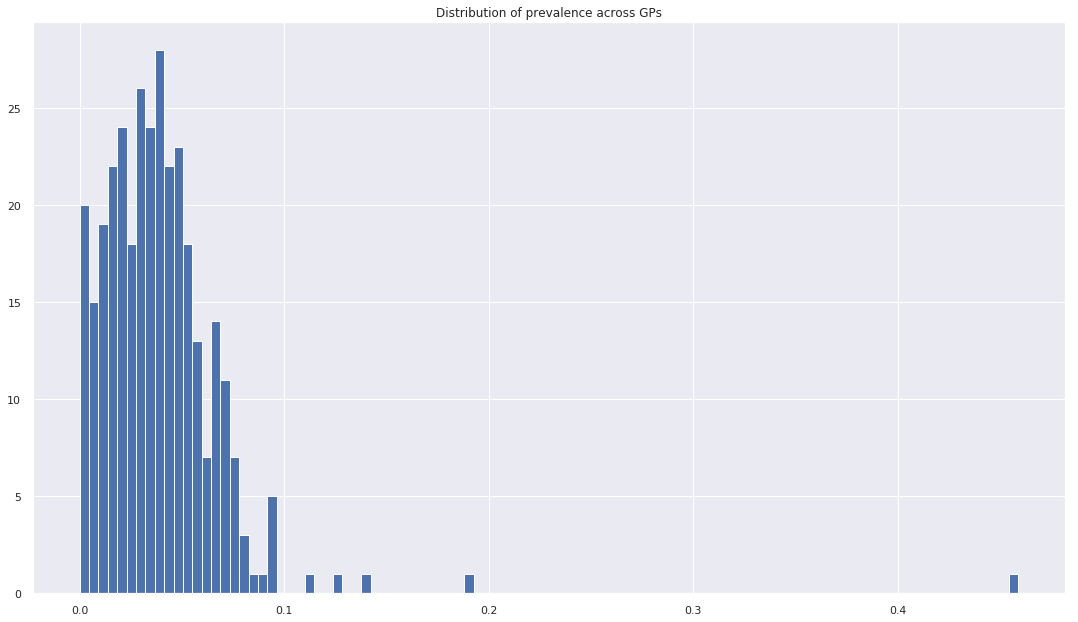

In [830]:
filtered = [k for k in presc_Disease_prevalence_area['201009']['depression'].values() if not np.isnan(k)]
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plt.hist(filtered,bins=100)

ax.set_title("Distribution of prevalence across GPs")
# ax.set_xlabel("Prevalence dementia")
ax.set_ylabel("")

In [831]:
presc_Disease_prevalence_area['201009']['depression']['City of London']

0.4588006886904924

In [832]:
Area_Gt = pd.read_csv('../BL_Work/prevalence_LA_method2/DEP.csv')

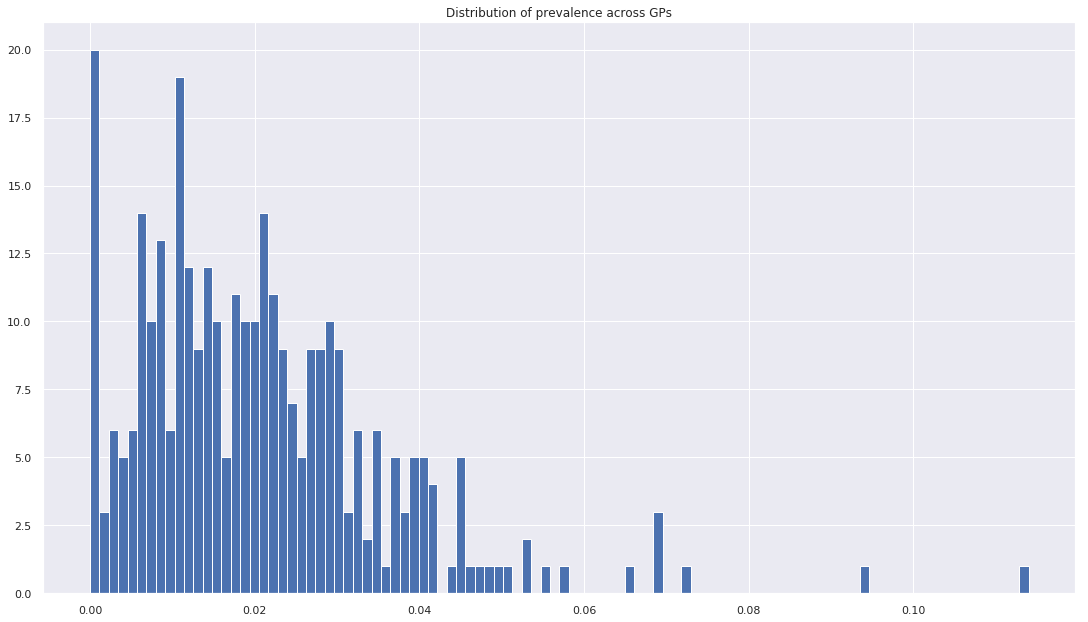

In [833]:
filtered = Area_Gt['prevalence']
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plt.hist(filtered,bins=100)

ax.set_title("Distribution of prevalence across GPs")

ax.set_ylabel("")

In [834]:
Area_Gt.head()

,Unnamed: 0,Area,prevalence
0,0,Mendip,0.029438
1,1,Hastings,0.022908
2,2,Windsor and Maidenhead,0.004760
3,3,Wyre Forest,0.000000
4,4,Peterborough,0.017392


In [835]:
Area_Gt = Area_Gt[Area_Gt['prevalence']!=1.000]

In [836]:
len(Area_Gt)

326

In [837]:
%store -r lon_boro

In [838]:
area_prevalence = presc_Disease_prevalence_area['201009']['depression']

In [839]:
presc_Disease_prevalence_area['201009'].keys()

['depression', 'diabetes']

In [840]:
# %store -r gt_dict

In [841]:
# list(set(area_prevalence.keys()).intersection(Area_Gt['Area']))

In [842]:
# subAreas = [k for k in lon_boro if k != 'City of London']
# subAreas = lon_boro
subAreas = list(set(area_prevalence.keys()).intersection(Area_Gt['Area']))

In [843]:
# filt_sub = [k for k in Area_values if Area_values[k]['patients'] < Area_values[k]['population']]

In [844]:
Area_values['Barnet']

{'patients': 723280.0, 'population': 363956}

In [845]:
# area_prevalence

In [846]:
Area_values['South Staffordshire']

{'patients': 213798.0, 'population': 107170}

In [855]:
predict = []
gt = []
names = []
predict_area_agg = {}
gt_area_agg = {}
for index, row in Area_Gt.iterrows():
    if row['Area'].strip() in subAreas:
        if row['prevalence'] >= 0: 
#             if area_patients[row['Area'].strip()] > 400000:# and area_patients[row['Area'].strip()] < 2000000:
            predict.append(area_prevalence[row['Area']])
            predict_area_agg[row['Area'].strip()] = area_prevalence[row['Area']]
            names.append(row['Area'].strip())
            gt.append(row['prevalence'])
            gt_area_agg[row['Area'].strip()] = row['prevalence']
#             gt.append(gt_dict[row['Area']])

In [856]:
%store predict_area_agg
%store gt_area_agg

Stored 'predict_area_agg' (dict)
Stored 'gt_area_agg' (dict)


In [848]:
# slope, intercept, r_value, p_value, std_err = linregress(predict,gt)


# print slope , intercept

# predicted = [(slope*k)+intercept for k in gt]

# residuals = [abs(v1 - v2) for (v1,v2) in zip(predicted,predict)]

# np.argsort(residuals)[-10:][::-1]

In [849]:
corr = pearsonr(predict,gt)

In [850]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

def filterHighestResiduals(gt,predict,names , topK):
    slope, intercept, r_value, p_value, std_err = linregress(predict,gt)
    predicted = [(slope*k)+intercept for k in gt]
    residuals = [np.square(v1 - v2) for (v1,v2) in zip(predicted,predict)]
    topKidx = np.argsort(residuals)[-topK:][::-1]
    return [gt[i] for i in topKidx] , [predict[i] for i in topKidx], [names[i] for i in topKidx]

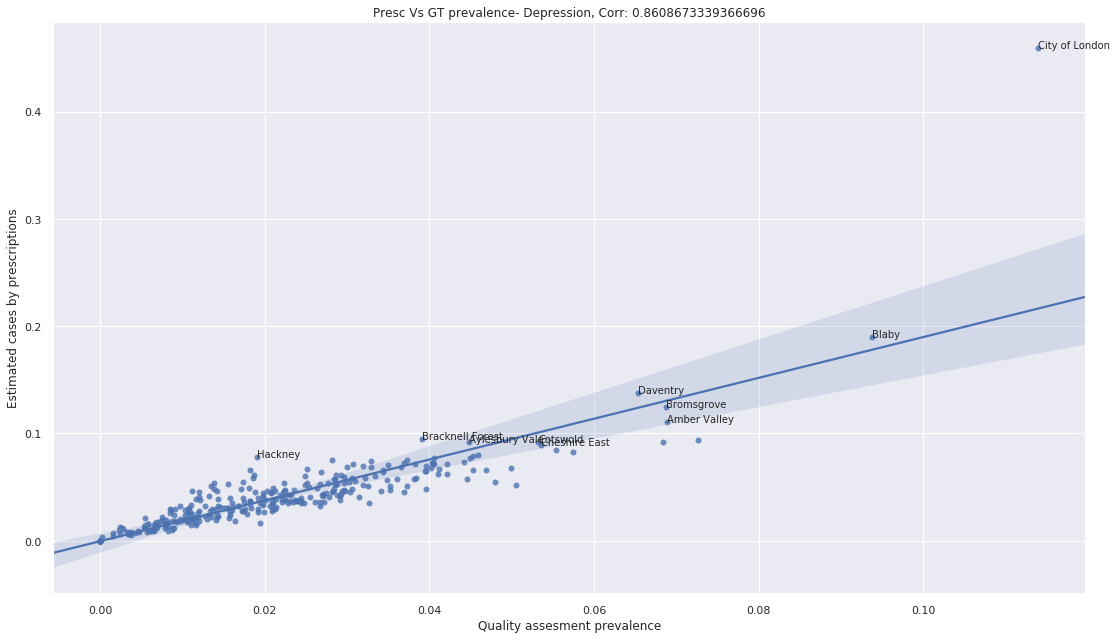

In [851]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=gt , y = predict , ax = ax)
gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
label_point(gt_ , predict_ , names_ , ax)
# label_point(gt , predict , names , ax)
ax.set_title("Presc Vs GT prevalence- Depression, Corr: " + str(corr[0]) )
ax.set_xlabel("Quality assesment prevalence")
ax.set_ylabel("Estimated cases by prescriptions",)